# Table of Contents
 <p><div class="lev1"><a href="#Learning-Objectives"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Objectives</a></div><div class="lev2"><a href="#Disclaimer"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Disclaimer</a></div><div class="lev1"><a href="#Plotting-with-ggplot"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plotting with ggplot</a></div><div class="lev1"><a href="#Building-your-plots-iteratively"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building your plots iteratively</a></div><div class="lev1"><a href="#Boxplot"><span class="toc-item-num">4&nbsp;&nbsp;</span>Boxplot</a></div><div class="lev2"><a href="#Challenges"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Challenges</a></div><div class="lev1"><a href="#Plotting-time-series-data"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plotting time series data</a></div><div class="lev1"><a href="#Faceting"><span class="toc-item-num">6&nbsp;&nbsp;</span>Faceting</a></div><div class="lev1"><a href="#Challenge"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge</a></div><div class="lev1"><a href="#Customization"><span class="toc-item-num">8&nbsp;&nbsp;</span>Customization</a></div>

# Learning Objectives #
By the end of this lesson the learner will:

* Be able to create a ggplot object
* Be able to set universal plot settings
* Be able to modify an existing ggplot object
* Be able to change the aesthetics of a plot such as colour
* Be able to edit the axis labels
* Know how to use a step-by-step approach to build complex plots
* Be able to create, scatter plots, box plots and time series plots
* Use the facet_wrap and facet_grid commands to create a collection of plots splitting the data by a factor variable
* Be able to create customized plot styles to meet their needs

## Disclaimer ##
 Python has powerful built-in plotting capabilities such as `matplotlib`, but for this exercise, we will be using the [`ggplot`](http://ggplot.yhathq.com/) package, which facilitates the creation of highly-informative plots of structured data based on the R implementation of [`ggplot2`](http://ggplot2.org/) and [The Grammar of Graphics](http://link.springer.com/book/10.1007%2F0-387-28695-0) by Leland Wilkinson.



In [1]:
import pandas as pd


surveys_complete = pd.read_csv( 'data_output/surveys_complete.csv', index_col=0)
surveys_complete.index.name = 'X'
surveys_complete

record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
X                                                                             
1            845      5    6  1978        2         NL   M               32   
2           1164      8    5  1978        2         NL   M               34   
3           1261      9    4  1978        2         NL   M               32   
4           1756      4   29  1979        2         NL   M               33   
5           1818      5   30  1979        2         NL   M               32   
6           1882      7    4  1979        2         NL   M               32   
7           2133     10   25  1979        2         NL   F               33   
8           2184     11   17  1979        2         NL   F               30   
9           2406      1   16  1980        2         NL   F               33   
10          3000      5   18  1980        2         NL   F               31   
11          3002      5   18  1980        2         NL   F               33   
12          4667      7    8  1981        2         NL   F               30   
13          4859     10    1  1981        2         NL   M               34   
14          5048     11   23  1981        2         NL   M               34   
15          5299      1   25  1982        2         NL   F               32   
16          5485      2   24  1982        2         NL   M               34   
17          5558      3   29  1982        2         NL   M               33   
18          5583      3   29  1982        2         NL   M               31   
19          5966      5   22  1982        2         NL   F               32   
20          6020      6   28  1982        2         NL   M               33   
21          6023      6   28  1982        2         NL   F               30   
22          6036      6   28  1982        2         NL   F               33   
23          6479      8   16  1982        2         NL   F               31   
24          6500      8   16  1982        2         NL   F               33   
25          8022      6   18  1983        2         NL   F               30   
26          8263      8   16  1983        2         NL   F               32   
27          8387      9   11  1983        2         NL   F               32   
28          8394      9   11  1983        2         NL   F               32   
29          8407      9   11  1983        2         NL   M               33   
30          8514     10   16  1983        2         NL   F               32   
...          ...    ...  ...   ...      ...        ...  ..              ...   
30434      28588      9   20  1998        7         PM   F               19   
30435      28589      9   20  1998        7         PM   F               20   
30436      28590      9   20  1998        7         PM   F               20   
30437      28668     10   24  1998        7         PM   F               20   
30438      28805     11   21  1998        7         PM   M               20   
30439      29489      4   17  1999        7         PM   M               21   
30440      15946      4    2  1989        7         RF   M               17   
30441      16652     11    4  1989        7         RF   F               18   
30442      25710      5   10  1997        7         PB   M               26   
30443      26042      6   10  1997        7         PB   F               27   
30444      26096      6   10  1997        7         PB   F               26   
30445      26356      7    9  1997        7         PB   M               27   
30446      26475      7    9  1997        7         PB   M               28   
30447      26546      7   29  1997        7         PB   M               27   
30448      26776      9   27  1997        7         PB   M               26   
30449      26819      9   27  1997        7         PB   M               30   
30450      28332      8   22  1998        7         PB   M               26   
30451      28336      8   22  1998        7         PB   

In [2]:
%matplotlib inline
from ggplot import *


# Plotting with ggplot

We will make the same plot using the `ggplot` package.

`ggplot` is a plotting package that makes it simple to create complex plots
from data in a dataframe. It uses default settings, which help creating
publication quality plots with a minimal amount of settings and tweaking.

ggplot graphics are built step by step by adding new elements.

To build a ggplot we need to:

- bind the plot to a specific data frame using the `data` argument




- define aesthetics (`aes`), by selecting the variables to be plotted and the variables to define the presentation
     such as plotting size, shape color, etc.,



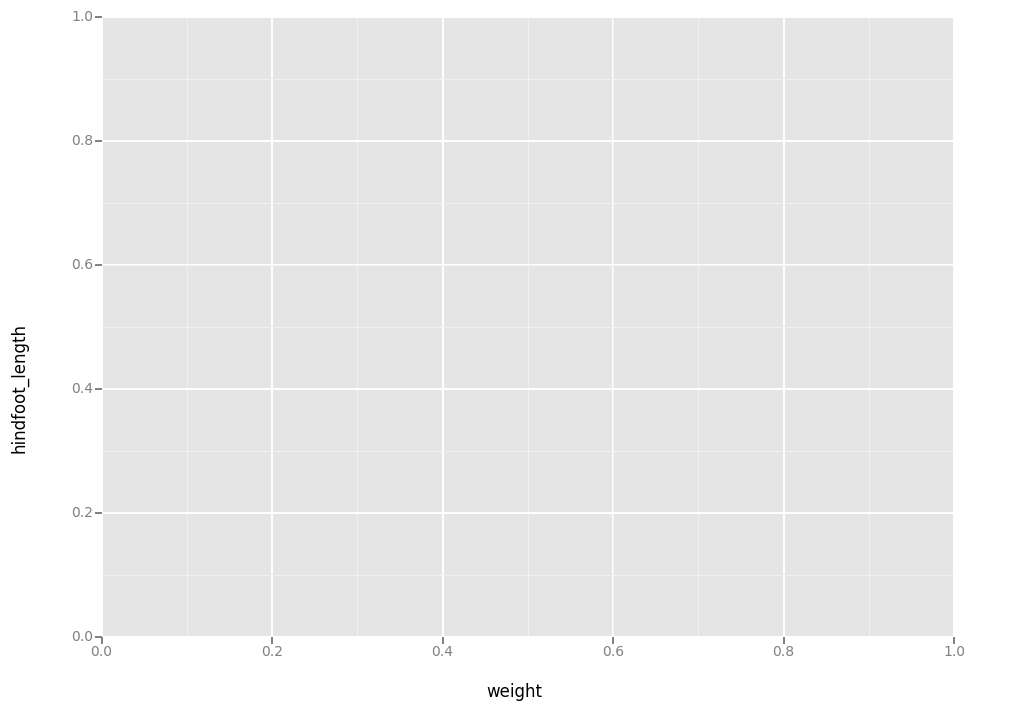

<ggplot: (-9223372036552543572)>

In [15]:
ggplot( aesthetics= aes(x = 'weight', y = 'hindfoot_length'), data = surveys_complete)


- add `geoms` -- graphical representation of the data in the plot (points,
     lines, bars). To add a geom to the plot use `+` operator:



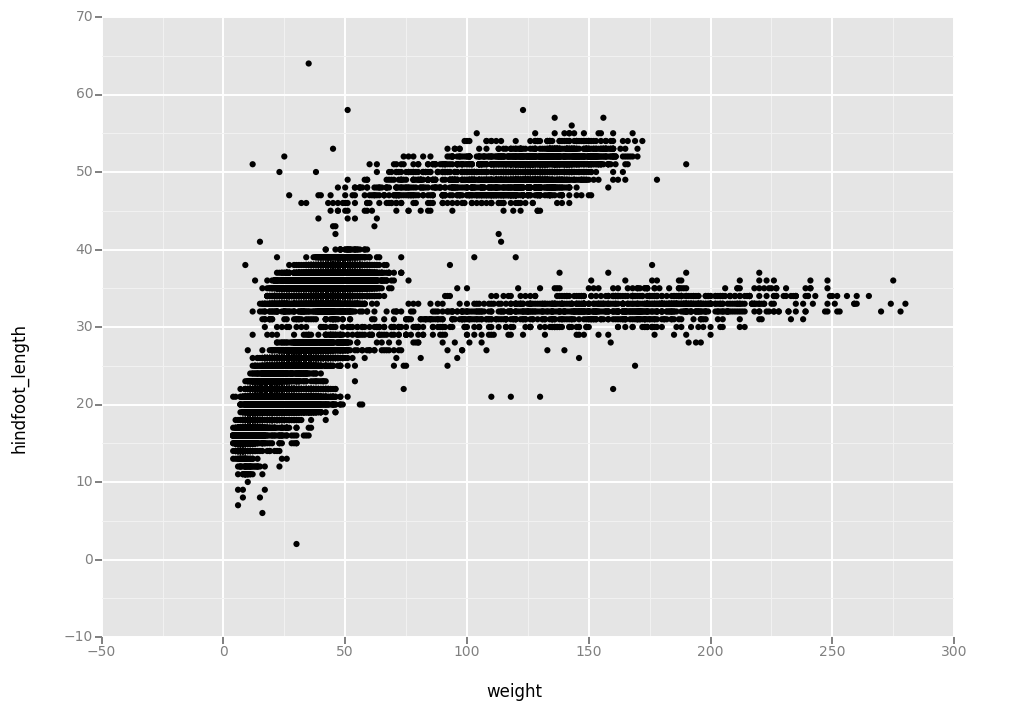

<ggplot: (295366541)>

In [4]:
ggplot( aes(x = 'weight', y = 'hindfoot_length'), data = surveys_complete) + geom_point()


The `+` in the `ggplot2` package is particularly useful because it allows you
to modify existing `ggplot` objects. This means you can easily set up plot
"templates" and conveniently explore different types of plots, so the above
plot can also be generated with code like this:



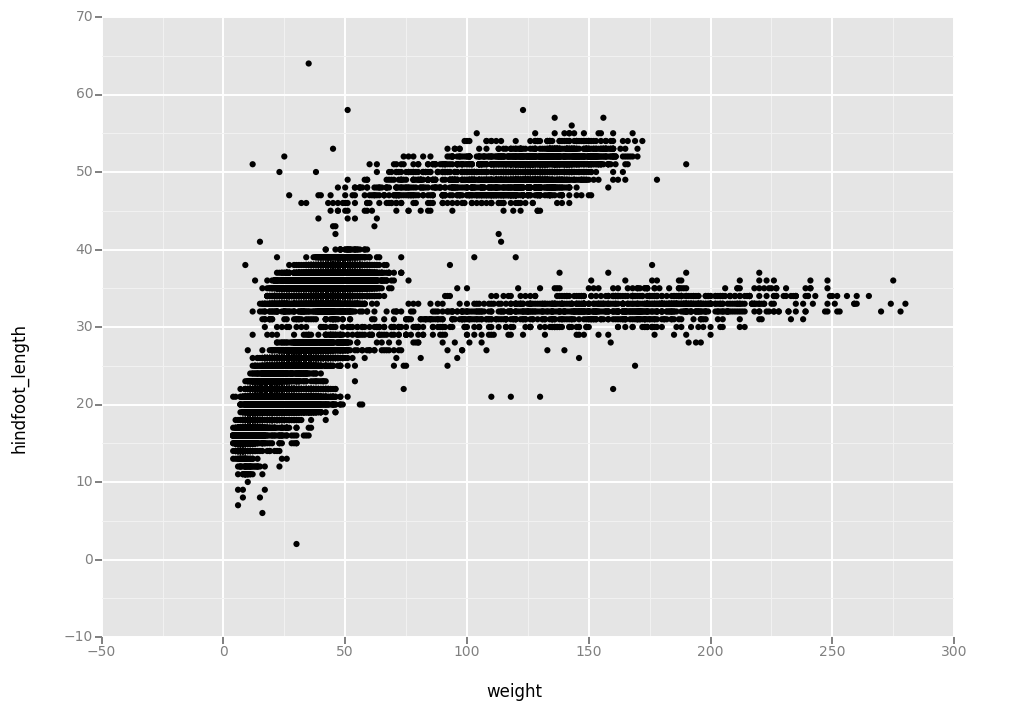

<ggplot: (295593725)>

In [5]:
# Create
surveys_plot = ggplot( aes(x = 'weight', y = 'hindfoot_length'), data = surveys_complete)

# Draw the plot
surveys_plot + geom_point()


Notes:

- Anything you put in the `ggplot()` function can be seen by any geom layers
  that you add (i.e., these are universal plot settings). This includes the x and
  y axis you set up in `aes()`.
- You can also specify aesthetics for a given geom independently of the
  aesthetics defined globally in the `ggplot()` function.


# Building your plots iteratively

Building plots with ggplot is typically an iterative process. We start by
defining the dataset we'll use, lay the axes, and choose a geom.



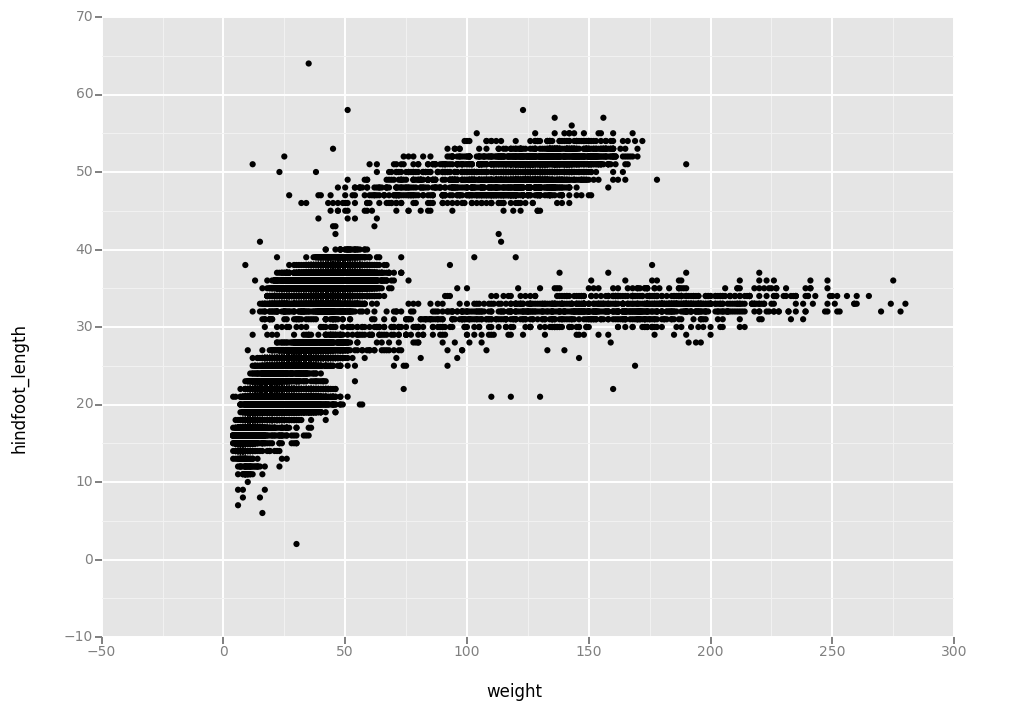

<ggplot: (-9223372036581788156)>

In [6]:
ggplot(aes(x = 'weight', y = 'hindfoot_length'), data = surveys_complete, ) + geom_point()


Then, we start modifying this plot to extract more information from it. For
instance, we can add transparency (alpha) to avoid overplotting.



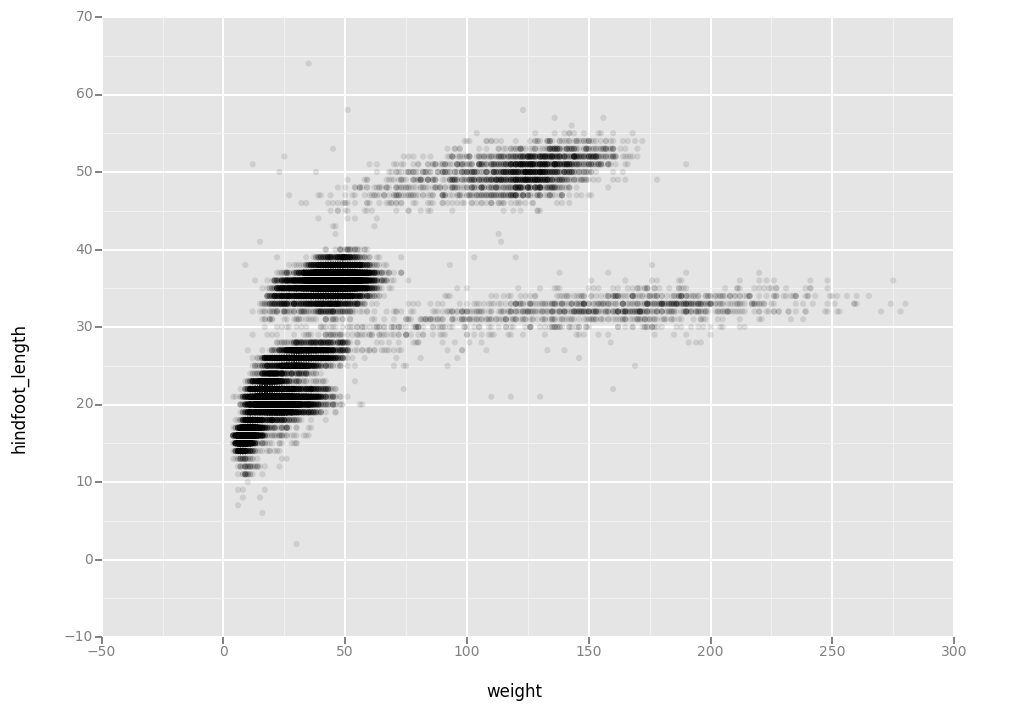

<ggplot: (295894448)>

In [7]:
ggplot(aes(x = 'weight', y = 'hindfoot_length'), data = surveys_complete) + \
    geom_point(alpha = 0.1)


We can also add colors for all the points



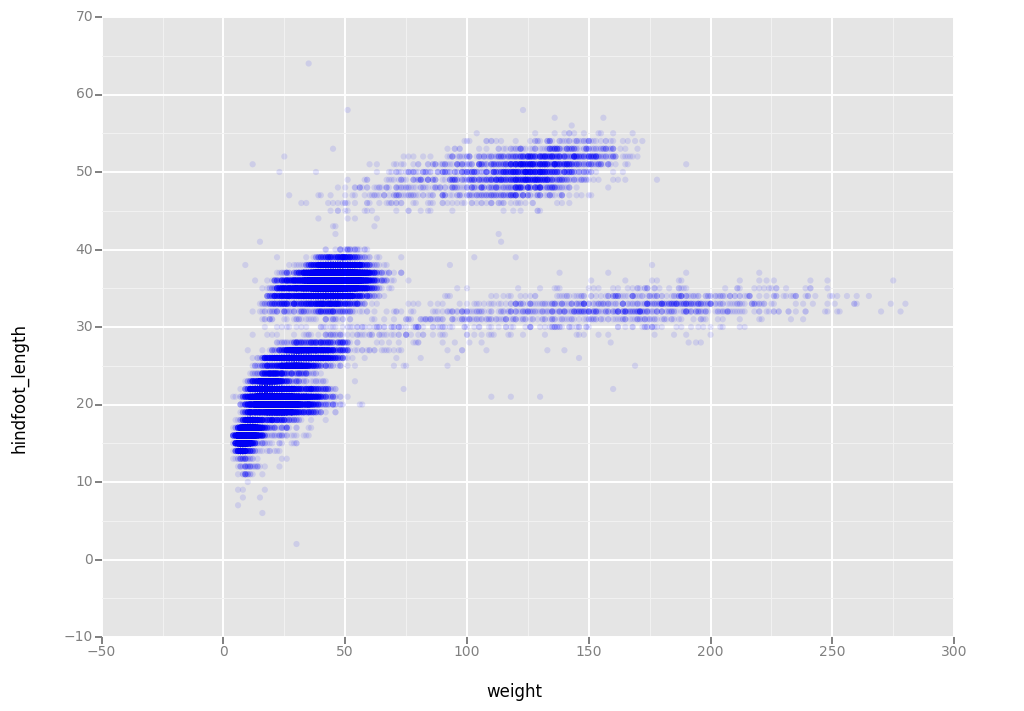

<ggplot: (291993969)>

In [8]:
ggplot(aes(x = 'weight', y = 'hindfoot_length'),data = surveys_complete) + \
    geom_point(alpha = 0.1, color = "blue")


Or to color each species in the plot differently:



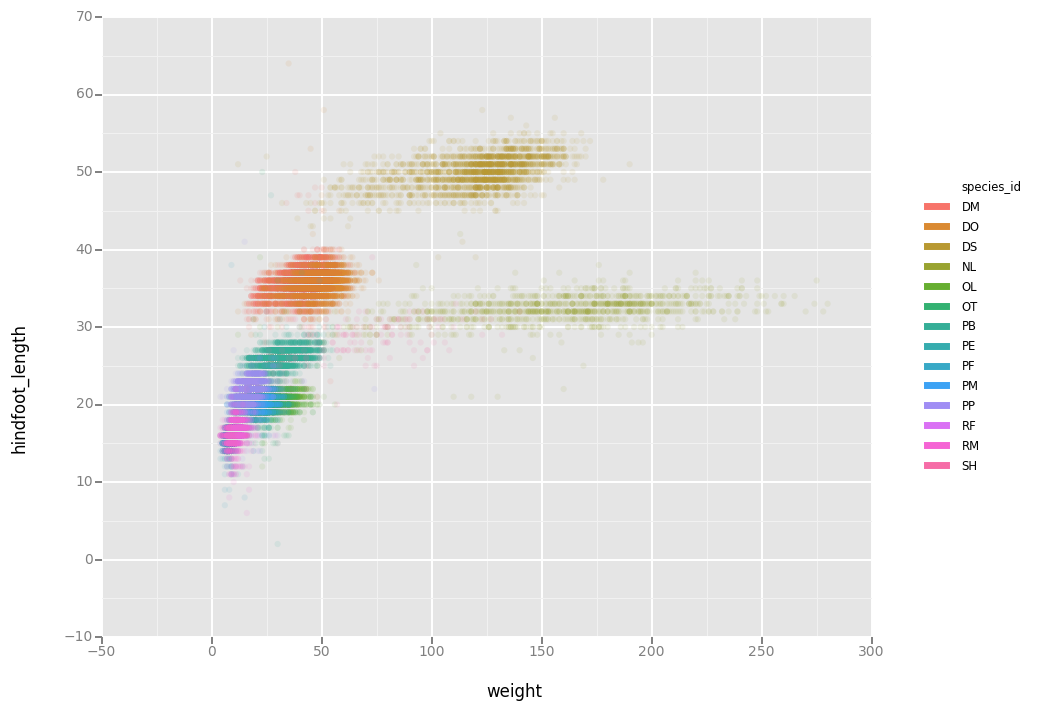

<ggplot: (295600781)>

In [9]:
# ggplot(data = surveys_complete, aes(x = weight, y = hindfoot_length)) +
#    geom_point(alpha = 0.1, aes(color=species_id))

ggplot(aes(x = 'weight', y = 'hindfoot_length', color='species_id'),data = surveys_complete) + \
    geom_point( alpha = 0.1)


# Boxplot

Visualising the distribution of weight within each species.



R code:

```R
ggplot(data = surveys_complete, aes(x = species_id, y = hindfoot_length)) +
    geom_boxplot()
```

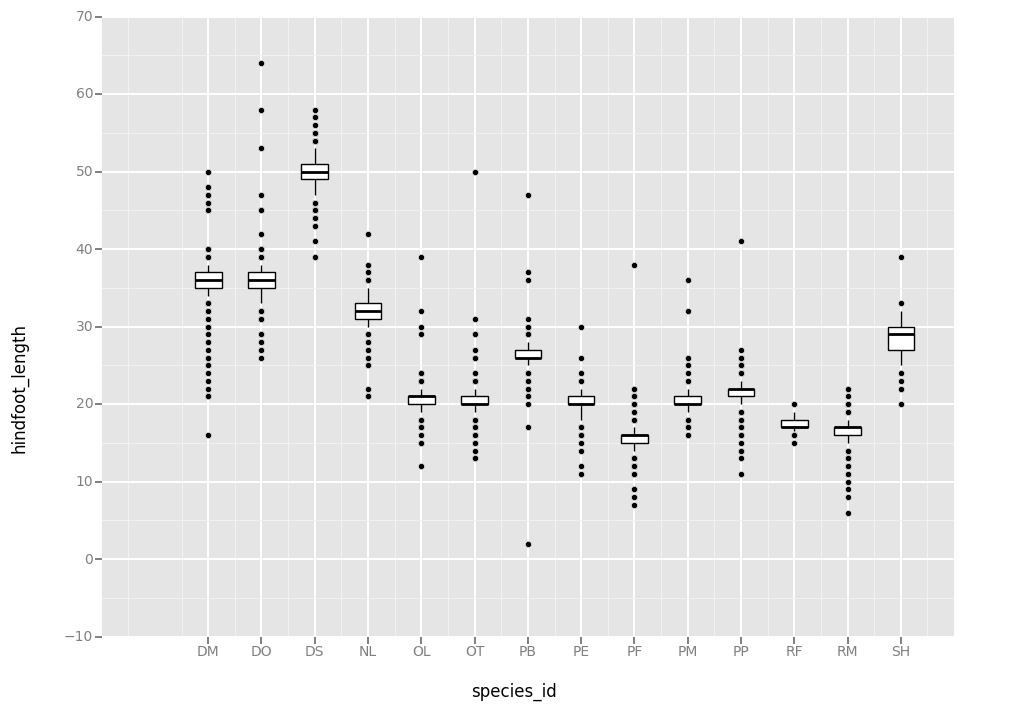

<ggplot: (-9223372036559103053)>

In [10]:
ggplot( aes(x = 'species_id', y = 'hindfoot_length'), data = surveys_complete) + geom_boxplot()


By adding points to boxplot, we can have a better idea of the number of
measurements and of their distribution:



R code:
```R
ggplot(data = surveys_complete, aes(x = species_id, y = hindfoot_length)) +
    geom_jitter(alpha = 0.3, color = "tomato") +
  geom_boxplot(alpha = 0)
```

In [ ]:
surveys_complete['species_factor'] = surveys_complete['species_id'].astype('category').cat.codes


xlabels = sorted(set(surveys_complete['species_id'].values) )
xcodes = sorted(set(surveys_complete['species_factor'].values))

ggplot(aes(x = 'species_factor', y = 'hindfoot_length'),data = surveys_complete) + \
    geom_point(position='jitter',alpha=0.7,jittersize=0.4) + \
        scale_x_continuous(breaks=xcodes, labels=xlabels) + \
                         xlab('species_id') + geom_boxplot(alpha=0)



Notice how the boxplot layer is behind the jitter layer? What do you need to
change in the code to put the boxplot in front of the points such that it's not
hidden.

## Challenges

> Boxplots are useful summaries, but hide the *shape* of the distribution. For
> example, if there is a bimodal distribution, this would not be observed with a
> boxplot. An alternative to the boxplot is the violin plot (sometimes known as a
> beanplot), where the shape (of the density of points) is drawn.
>
> - Replace the box plot with a violin plot; see `geom_violin()`
>
> In many types of data, it is important to consider the *scale* of the
> observations.  For example, it may be worth changing the scale of the axis to
> better distribute the observations in the space of the plot.  Changing the scale
> of the axes is done similarly to adding/modifying other components (i.e., by
> incrementally adding commands).
>
> - Represent weight on the log10 scale; see `scale_y_log10()`
>
> - Create boxplot for `hindfoot_length`.
>
> - Add color to the datapoints on your boxplot according to the plot from which
>   the sample was taken (`plot_id`)

Hint: Check the class for `plot_id`. Consider changing the class of `plot_id`
from integer to factor. Why does this change how R makes the graph?



In [ ]:
## Challenges:
##  Start with the boxplot we created:
ggplot(aes(x = 'species_factor', y = 'hindfoot_length'),data = surveys_complete) + \
    geom_jitter(alpha=0.3) + \
        scale_x_discrete(breaks=xcodes, labels=xlabels) + \
                         xlab('species_id') + geom_boxplot(alpha=0)

In [ ]:
##  1. Replace the box plot with a violin plot; see `geom_violin()`.

ggplot(aes(x = 'species_factor', y = 'hindfoot_length'),data = surveys_complete) + \
    geom_jitter(alpha=0.3) + \
        scale_x_discrete(breaks=xcodes, labels=xlabels) + \
                         xlab('species_id') + geom_violin(alpha=0)

In [ ]:
##  2. Represent weight on the log10 scale; see `scale_y_log10()`.
ggplot(aes(x = 'species_factor', y = 'hindfoot_length'),data = surveys_complete) + \
    geom_jitter(alpha=0.3) + \
        scale_x_discrete(breaks=xcodes, labels=xlabels) + \
                         xlab('species_id') + geom_violin(alpha=0) + \
            scale_y_log(base=10)

In [ ]:
##  3. Create boxplot for `hindfoot_length`.
ggplot(aes(x = 'species_factor', y = 'hindfoot_length'),data = surveys_complete) + \
    geom_jitter(alpha=0.01) + \
        scale_x_discrete(breaks=xcodes, labels=xlabels) + \
                         xlab('species_id') + geom_boxplot(alpha=0) + \
            scale_y_log(base=10)
            

In [ ]:
##  4. Add color to the datapoints on your boxplot according to the
##  plot from which the sample was taken (`plot_id`).
##  Hint: Check the class for `plot_id`. Consider changing the class
##  of `plot_id` from integer to factor. Why does this change how R
##  makes the graph?

ggplot(aes(x = 'species_factor', y = 'hindfoot_length', color='plot_id'),data = surveys_complete) + \
    geom_jitter(alpha=0.01) + \
        scale_x_discrete(breaks=xcodes, labels=xlabels) + \
                         xlab('species_id') + geom_boxplot(alpha=0) + \
            scale_y_log(base=10)
     



# Plotting time series data

Let's calculate number of counts per year for each species. To do that we need
to group data first and count records within each group.



In [ ]:
#yearly_counts <- surveys_complete %>%
                 group_by(year, species_id) %>%
                 tally

In [11]:
yearly_counts = surveys_complete[['year','species_id','species']].groupby(['year', 'species_id']).count().reset_index()
yearly_counts.columns = ['year','species_id', 'n']
yearly_counts

year species_id    n
0    1977         DM  181
1    1977         DO   12
2    1977         DS   29
3    1977         OL    1
4    1977         PE    2
5    1977         PF   22
6    1977         PP    3
7    1977         RM    2
8    1978         DM  336
9    1978         DO   21
10   1978         DS  272
11   1978         NL   23
12   1978         OL   35
13   1978         OT   45
14   1978         PE   12
15   1978         PF   33
16   1978         PM    2
17   1978         PP   23
18   1978         RM    2
19   1978         SH    1
20   1979         DM  183
21   1979         DO   28
22   1979         DS  183
23   1979         NL   30
24   1979         OL   43
25   1979         OT   63
26   1979         PE   16
27   1979         PF   16
28   1979         PM    6
29   1979         PP   19
..    ...        ...  ...
262  2000         OT  145
263  2000         PB  545
264  2000         PE   13
265  2000         PM    2
266  2000         PP  368
267  2000         RM   15
268  2000         SH    7
269  2001         DM  292
270  2001         DO   77
271  2001         NL   44
272  2001         OT  153
273  2001         PB  520
274  2001         PE   35
275  2001         PF   26
276  2001         PM    3
277  2001         PP  258
278  2001         RM   15
279  2001         SH    9
280  2002         DM  302
281  2002         DO  243
282  2002         NL   42
283  2002         OL    7
284  2002         OT  119
285  2002         PB  868
286  2002         PE   57
287  2002         PF   18
288  2002         PM    1
289  2002         PP  375
290  2002         RM   20
291  2002         SH    9

[292 rows x 3 columns]


Timelapse data can be visualised as a line plot with years on x axis and counts
on y axis.



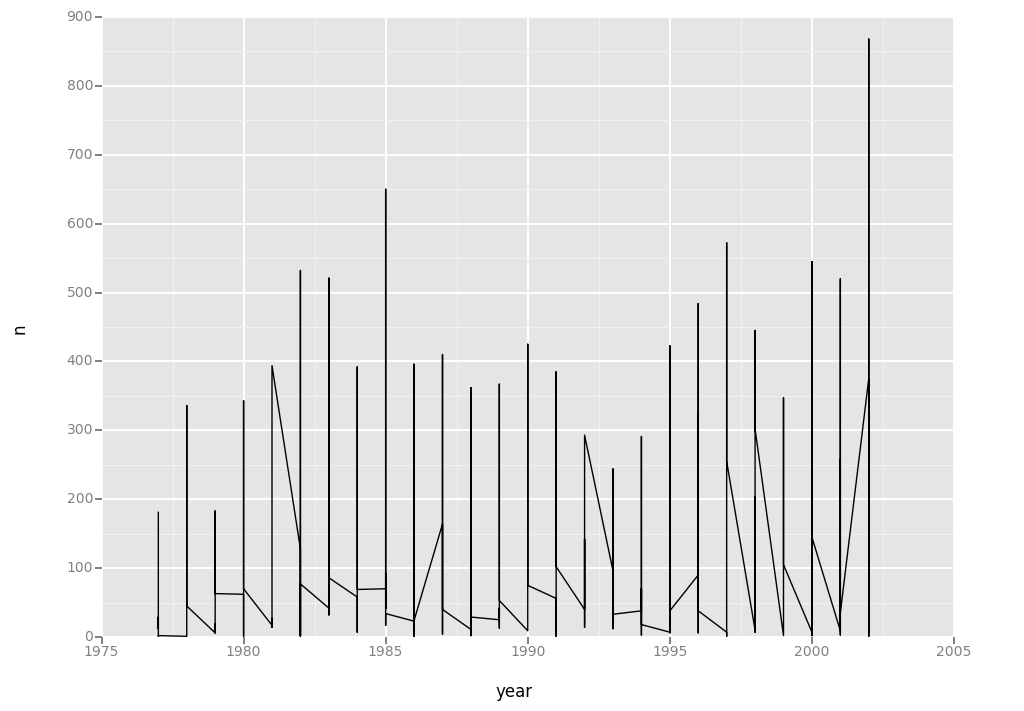

<ggplot: (-9223372036580461736)>

In [12]:
ggplot(aes(x = 'year', y = 'n'),data = yearly_counts) + \
     geom_line()


Unfortunately this does not work, because we plot data for all the species
together. We need to tell ggplot to draw a line for each species by modifying
the aesthetic function to include `group = species_id`.



In [ ]:
%%R
ggplot(data = yearly_counts, aes(x = year, y = n, group = species_id)) +
    geom_line()


In [ ]:
ggplot(aes(x = 'year', y = 'n', group='species_id'),data = yearly_counts) + geom_line()


We will be able to distinguish species in the plot if we add colors.



In [ ]:
##R

ggplot(data = yearly_counts, aes(x = year, y = n, group = species_id, colour = species_id)) +
    geom_line()

In [ ]:
ggplot(aes(x = 'year', y = 'n', color='species_id'),data = yearly_counts) + geom_line()


# Faceting

ggplot has a special technique called *faceting* that allows to split one plot
into multiple plots based on a factor included in the dataset. We will use it to
make one plot for a time series for each species.



%%R
ggplot(data = yearly_counts, aes(x = year, y = n, group = species_id, colour = species_id)) +
    geom_line() +
    facet_wrap(~ species_id)


In [ ]:
ggplot(aes(x = "year", y = "n", colour = "species_id"),data = yearly_counts) + \
    geom_line() + \
    facet_wrap("species_id")
    


Now we would like to split line in each plot by sex of each individual
measured. To do that we need to make counts in data frame grouped by year,
species_id, and sex:



In [ ]:
 ##R 
yearly_sex_counts <- surveys_complete %>%
                      group_by(year, species_id, sex) %>%
                      tally

In [ ]:
yearly_sex_counts = surveys_complete.groupby( ['year','species_id', 'sex']).count()
yearly_sex_counts['n']  = yearly_sex_counts['record_id']
yearly_sex_counts = yearly_sex_counts['n'].reset_index()
yearly_sex_counts


We can now make the faceted plot splitting further by sex (within a single plot):



In [ ]:
 ##R
ggplot(data = yearly_sex_counts, aes(x = year, y = n, color = species_id, group = sex)) +
     geom_line() +
     facet_wrap(~ species_id)

In [ ]:
 ggplot(aes(x = "year", y = "n", color = "species_id", group = "sex"), data = yearly_sex_counts, ) + \
     geom_line() + \
         facet_wrap( "species_id")


Usually plots with white background look more readable when printed.  We can set
the background to white using the function `theme_bw()`. Additionally you can also remove
the grid.



In [ ]:
 ggplot(data = yearly_sex_counts, aes(x = year, y = n, color = species_id, group = sex)) +
     geom_line() +
     facet_wrap(~ species_id) +
     theme_bw() +
     theme(panel.grid.major.x = element_blank(),
	   panel.grid.minor.x = element_blank(),
	   panel.grid.major.y = element_blank(),
	   panel.grid.minor.y = element_blank())

In [ ]:
 ggplot(aes(x = "year", y = "n", color = "species_id", group = "sex"),data = yearly_sex_counts ) + \
     geom_line() + \
            facet_wrap( "species_id") + \
                theme_bw() + \
                theme()


To make the plot easier to read, we can color by sex instead of species (species
are already in separate plots, so we don't need to distinguish them further).



In [ ]:
%%R
ggplot(data = yearly_sex_counts, aes(x = year, y = n, color = sex, group = sex)) +
    geom_line() +
    facet_wrap(~ species_id) +
    theme_bw()

In [ ]:
ggplot(aes(x = "year", y = "n", color = "sex", group = "sex"), data = yearly_sex_counts) + \
    geom_line() + \
    facet_wrap("species_id") + \
    theme_bw() 



# Challenge

> Use what you just learned to create a plot that depicts how the average weight
> of each species changes through the years.

<!-- Answer


In [ ]:
%%R
yearly_weight <- surveys_complete %>%
                 group_by(year, species_id) %>%
                 summarise(avg_weight = mean(weight))


In [ ]:
yearly_weight = surveys_complete[["year", "species_id","weight"]].groupby(["year", "species_id"]).mean().reset_index()
yearly_weight.columns =   ["year", "species_id","avg_weight"]  
yearly_weight

In [ ]:
##R
ggplot(data = yearly_weight, aes(x=year, y=avg_weight, color = species_id, group = species_id)) +
    geom_line() +
    facet_wrap(~ species_id) +
    theme_bw()

In [ ]:
ggplot( aes(x="year", y="avg_weight", color = "species_id", group = "species_id"),data = yearly_weight) + \
    geom_line() + \
    facet_wrap("species_id") + \
    theme_bw()

-->



In [ ]:
## Plotting time series challenge:
##  Use what you just learned to create a plot that depicts how the
##  average weight of each species changes through the years.



The `facet_wrap` geometry extracts plots into an arbitrary number of dimensions
to allow them to cleanly fit on one page. On the other hand, the `facet_grid`
geometry allows you to explicitly specify how you want your plots to be
arranged via formula notation (`rows ~ columns`; a `.` can be used as
a placeholder that indicates only one row or column).

Let's modify the previous plot to compare how the weights of male and females
has changed through time.



In [ ]:
##R
## One column, facet by rows
yearly_sex_weight <- surveys_complete %>%
    group_by(year, sex, species_id) %>%
    summarize(avg_weight = mean(weight))
    

In [ ]:
## One column, facet by rows
yearly_sex_weight = surveys_complete[
    ['year','sex','species_id','weight']].groupby(
    ["year", "sex", "species_id"]).mean().reset_index()
yearly_sex_weight.columns = ['year','sex','species_id','avg_weight']
yearly_sex_weight

In [ ]:
%%R
ggplot(data = yearly_sex_weight, aes(x=year, y=avg_weight, color = species_id, group = species_id)) +
    geom_line() +
    facet_grid(sex ~ .)

In [ ]:
ggplot( aes(x="year", y="avg_weight", color = "species_id", group = "species_id"),data = yearly_sex_weight) + \
    geom_line() + \
    facet_grid("sex")

In [ ]:
# One row, facet by column
ggplot(data = yearly_sex_weight, aes(x=year, y=avg_weight, color = species_id, group = species_id)) +
    geom_line() +
    facet_grid(. ~ sex)

In [ ]:
# One row, facet by column
ggplot( aes(x="year", y="avg_weight", color = "species_id", group = "species_id"),data = yearly_sex_weight) + \
    geom_line() + \
    facet_grid(None, "sex")


# Customization

Take a look at the ggplot2 cheat sheet
(https://www.rstudio.com/wp-content/uploads/2015/08/ggplot2-cheatsheet.pdf), and
think of ways to improve the plot. You can write down some of your ideas as
comments in the Etherpad.

Now, let's change names of axes to something more informative than 'year'
and 'n' and add a title to this figure:



In [ ]:
%%R

ggplot(data = yearly_sex_counts, aes(x = year, y = n, color = sex, group = sex)) +
    geom_line() +
    facet_wrap(~ species_id) +
    labs(title = 'Observed species in time',
         x = 'Year of observation',
         y = 'Number of species') +
    theme_bw()

In [ ]:
ggplot( aes(x = "year", y = "n", color = "sex", group = "sex"),data = yearly_sex_counts) + \
    geom_line() + \
    facet_wrap( "species_id" ) + \
    labs(title = 'Observed species in time',
         x = 'Year of observation',
         y = 'Number of species') + \
    theme_bw() 


The axes have more informative names, but their readability can be improved by
increasing the font size. While we are at it, we'll also change the font family:



In [ ]:
%%R

ggplot(data = yearly_sex_counts, aes(x = year, y = n, color = sex, group = sex)) +
    geom_line() +
    facet_wrap(~ species_id) +
    labs(title = 'Observed species in time',
        x = 'Year of observation',
        y = 'Number of species') +
    theme_bw() +
    theme(text=element_text(size=16, family="Arial"))

In [ ]:
ggplot( aes(x = "year", y = "n", color = "sex", group = "sex"),data = yearly_sex_counts) + \
    geom_line() + \
    facet_wrap( "species_id" ) + \
    theme_bw() + \
    theme(axis_title_x = element_text(size=16, family="Arial"),
         axis_title_y = element_text(size=16, family="Arial")) + \
    labs(title = 'Observed species in time',
        x = 'Year of observation',
        y = 'Number of species')


After our manipulations we notice that the values on the x-axis are still not
properly readable. Let's change the orientation of the labels and adjust them
vertically and horizontally so they don't overlap. You can use a 90 degree
angle, or experiment to find the appropriate angle for diagonally oriented
labels.



In [ ]:
%%R

ggplot(data = yearly_sex_counts, aes(x = year, y = n, color = sex, group = sex)) +
    geom_line() +
    facet_wrap(~ species_id) +
    labs(title = 'Observed species in time',
        x = 'Year of observation',
        y = 'Number of species') +
    theme_bw() +
    theme(axis.text.x = element_text(colour="grey20", size=12, angle=90, hjust=.5, vjust=.5),
                        axis.text.y = element_text(colour="grey20", size=12),
          text=element_text(size=16, family="Arial"))

In [ ]:
ggplot( aes(x = "year", y = "n", color = "sex", group = "sex"),data = yearly_sex_counts) + \
    geom_line() + \
    facet_wrap( "species_id" ) + \
    labs(title = 'Observed species in time',
        x = 'Year of observation',
        y = 'Number of species') + \
    theme_bw() + \
    theme(axis_text_x = element_text(color="grey", size=10, angle=90, hjust=.5, vjust=.5),
          axis_text_y = element_text(color="grey", size=10, hjust=0),
         ) 


If you like the changes you created to the default theme, you can save them as
an object to easily apply them to other plots you may create:




In [ ]:
arial_grey_theme <- theme(axis.text.x = element_text(colour="grey20", size=12, angle=90, hjust=.5, vjust=.5),
                          axis.text.y = element_text(colour="grey20", size=12),
                          text=element_text(size=16, family="Arial"))
ggplot(surveys_complete, aes(x = species_id, y = hindfoot_length)) +
    geom_boxplot() +
    arial_grey_theme

In [ ]:
arial_grey_theme = theme(axis_text_x = element_text(color="grey", size=10, angle=90, hjust=.5, vjust=.5),
                          axis_text_y = element_text(color="grey", size=10))
ggplot(surveys_complete, aes(x = 'species_id', y = 'hindfoot_length')) + \
    geom_boxplot() + \
    arial_grey_theme


With all of this information in hand, please take another five minutes to either
improve one of the plots generated in this exercise or create a beautiful graph
of your own. Use the RStudio ggplot2 cheat sheet, which we linked earlier for
inspiration.

Here are some ideas:

* See if you can change thickness of the lines.
* Can you find a way to change the name of the legend? What about its labels?
* Use a different color palette (see http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/)

After creating your plot, you can save it to a file in your favourite format.
You can easily change the dimension (and its resolution) of your plot by
adjusting the appropriate arguments (`width`, `height` and `dpi`):



In [ ]:
%%R
my_plot <- ggplot(data = yearly_sex_counts, aes(x = year, y = n, color = sex, group = sex)) +
    geom_line() +
    facet_wrap(~ species_id) +
    labs(title = 'Observed species in time',
        x = 'Year of observation',
        y = 'Number of species') +
    theme_bw() +
    theme(axis.text.x = element_text(colour="grey20", size=12, angle=90, hjust=.5, vjust=.5),
                        axis.text.y = element_text(colour="grey20", size=12),
          text=element_text(size=16, family="Arial"))
ggsave("name_of_file.png", my_plot, width=15, height=10)

In [ ]:
my_plot =  ggplot(yearly_sex_counts, aes(x = "year", y = "n", color = "sex", group = "sex")) 
my_plot += geom_line() 
my_plot += facet_wrap("species_id") 
my_plot += labs(title = 'Observed species in time',
                x = 'Year of observation',
                y = 'Number of species') 
my_plot += theme_bw() 
my_plot += theme(axis_text_x = element_text(color="grey", size=10, angle=90, hjust=.5, vjust=.5),
                        axis_text_y = element_text(color="grey", size=10))
my_plot.save("name_of_file.png", width=15, height=10)

In [ ]:
## Final plotting challenge:
##  With all of this information in hand, please take another five
##  minutes to either improve one of the plots generated in this
##  exercise or create a beautiful graph of your own. Use the RStudio
##  ggplot2 cheat sheet for inspiration:
##  https://www.rstudio.com/wp-content/uploads/2015/08/ggplot2-cheatsheet.pdf
